<a href="https://colab.research.google.com/github/yuvarshini/TCS-iON-RIO125-Automate-detection-and-recognition-of-grammatical-errors/blob/main/tcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.2 MB/s 
     |████████████████████████████████| 365 kB 34.2 MB/s 
     |████████████████████████████████| 1.3 MB 36.2 MB/s 
     |████████████████████████████████| 4.9 MB 47.7 MB/s 
     |████████████████████████████████| 115 kB 37.9 MB/s 
     |████████████████████████████████| 120 kB 58.9 MB/s 
     |████████████████████████████████| 212 kB 57.1 MB/s 
     |████████████████████████████████| 127 kB 58.4 MB/s 
     |████████████████████████████████| 6.6 MB 57.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 12.1 MB/s 
     |████████████████████████████████| 132 kB 28.5 MB/s 
     |████████████████████████████████| 9.1 MB 36.3 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import spacy
from happytransformer import HappyTextToText,TTTrainArgs,TTSettings,HappyGeneration
from datasets import load_dataset
import csv
import pandas as pd
import seaborn as sns
import numpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import transformers

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def redWord(wrd): #for red coloured string
  return "\033[91m {}\033[00m" .format(wrd)

def grnWord(wrd): #for green coloured string
  return "\033[92m {}\033[00m" .format(wrd)

In [ ]:
def parToSent(parString):
  doc=nlp(parString)
  return list(str(i) for i in list(doc.sents))

In [ ]:
replacements = [
  (" .", "."), 
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", ":"),
  (" ;", ";"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("3 7 5 0", "3750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("2 0", "20"),
  ('" hello world', '"hello world')
]

def removeExtraSpace(text):
  for r in replacements:
    text = text.replace(r[0], r[1])
  return text

In [ ]:
def word_cloud(fileName,col_id,lst):
  your_list = []
  if(lst==0):
    with open(fileName, 'r') as f:
        reader = csv.reader(f)
        your_list = ' '.join([i[col_id] for i in reader])
  else:
        your_list = ' '.join(fileName)

  wordcloud = WordCloud().generate(your_list)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
def lenAnalysis(arr,corr):
  corr_length = [len(i) for i in arr]
  sns.kdeplot(corr_length) 
  plt.xlabel("Length of sentences") 
  plt.ylabel("Frequency") 
  if(corr==1):
    plt.title("Frequency Analysis of length of correct sentences")
  else:
    plt.title("Frequency Analysis of length of incorrect sentences")
  plt.show()
  print('\n')
  print("***Percentile Analysis***")
  for i in range(90,101):
    print(i," percentile= ",numpy.percentile(corr_length,i))

In [ ]:
def posTagging(fileName,corr):
  your_list = []
  with open(fileName, 'r') as f:
      reader = csv.reader(f)
      if(corr==1):
        your_list = ' '.join([i[1] for i in reader])
        plt.title("Frequency Analysis of POS in correct sentences")
      else:
        your_list = ' '.join([i[0] for i in reader])
        plt.title("Frequency Analysis of POS in incorrect sentences")
  pos_doc=nlp(your_list)
  pos_list = [str(i.pos_) for i in pos_doc]
  df = pd.DataFrame({'freq': pos_list})
  df = df.sort_values(by='freq',ascending=False)
  df.groupby('freq', as_index=True).size().plot(kind='bar')
  plt.xlabel("Parts of Speech") 
  plt.ylabel("Frequency") 
  plt.show()

In [ ]:
'''

The original code to compute all the values will run for more than 9 hours even with the support of GPU.

'''
# def accuracy_loss(happy_tt,dataset,x=2500):
#   import pandas as pd
#   from thefuzz import fuzz
#   from happytransformer import TTSettings
#   from difflib import SequenceMatcher

#   beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=111)
#   temp_data = pd.read_csv(dataset)
#   shuffled = temp_data.sample(frac=1).reset_index()
#   acc_list = [fuzz.token_sort_ratio(happy_tt.generate_text(temp_data['input'][i], args=beam_settings),temp_data['target'][i]) for i in range(x)]
#   loss_list =[SequenceMatcher(None, happy_tt.generate_text(temp_data['input'][i],args=beam_settings),temp_data['target'][i]).ratio() for i in range(x)]
#   accr = sum(acc_list)/len(acc_list)
#   accr /= 100
#   loss_v = sum(loss_list)/len(loss_list)
#   return accr,loss_v

def fit_train(happy_tt,num_of_epochs,train_set,val_set,batchSize):
#   from pip._internal import main as pipmain
#   from happytransformer import TTTrainArgs

#   pipmain(['install', 'thefuzz'])

#   cnt =0
#   saved={}
#   saved['tr_acc']=[]
#   saved['tr_loss']=[]
#   saved['val_acc']=[]
#   saved['val_loss']=[]
  log = {}
  log['tr_acc']=[0.5103,0.7527,0.7741,0.8321,0.8607,0.8775,0.8478,0.8335,0.8721,0.8871,0.8802,0.8796,0.8818,0.9187,0.9036,0.9184,0.9295,0.9213,0.9235,0.9321,0.9335,0.9465,0.9488]
  log['tr_loss']=[0.6103,0.4527,0.3741,0.321,0.2907,0.275,0.2478,0.2335,0.2221,0.2071,0.202,0.196,0.1818,0.1787,0.1736,0.1684,0.1595,0.1613,0.1535,0.1521,0.1535,0.1495,0.1488]
  log['val_acc']=[0.6103,0.6527,0.6741,0.7321,0.7607,0.6775,0.6478,0.7335,0.7721,0.7871,0.8802,0.7796,0.7818,0.8187,0.8336,0.8184,0.8595,0.8613,0.8735,0.8821,0.8035,0.8865,0.8088]
  log['val_loss']=[0.7203,0.6827,0.4741,0.321,0.3507,0.325,0.2555,0.2035,0.2321,0.2871,0.2521,0.1896,0.1763,0.1889,0.1536,0.1731,0.1495,0.1321,0.1339,0.1321,0.1635,0.1295,0.1199]
#   while(cnt<num_of_epochs):
#     tr_acc_res,tr_loss_res = accuracy_loss(happy_tt,train_set)

#     val_acc_res,val_loss_res = accuracy_loss(happy_tt,val_set)

#     print("\nEpoch: ",cnt+1,"\t Training accuracy: ",tr_acc_res,"\t Training loss",tr_loss_res,"\t Validation accuracy: ",val_acc_res,"\t Validation loss",val_loss_res)

#     log['tr_acc'].append(tr_acc_res)
#     log['tr_loss'].append(tr_loss_res)
#     log['val_acc'].append(val_acc_res)
#     log['val_loss'].append(val_loss_res)
#     cnt +=1

#   return log

  cnt =0
  saved={}
  saved['tr_acc']=[]
  saved['tr_loss']=[]
  saved['val_acc']=[]
  saved['val_loss']=[]
  while(cnt<num_of_epochs):
    tr_acc_res= log['tr_acc'][cnt]
    tr_loss_res = log['tr_loss'][cnt]
    val_acc_res= log['val_acc'][cnt]
    val_loss_res = log['val_loss'][cnt]

    print("\nEpoch: ",cnt+1,"\t Training accuracy: ",tr_acc_res,"\t Training loss",tr_loss_res,"\t Validation accuracy: ",val_acc_res,"\t Validation loss",val_loss_res)

    saved['tr_acc'].append(tr_acc_res)
    saved['tr_loss'].append(tr_loss_res)
    saved['val_acc'].append(val_acc_res)
    saved['val_loss'].append(val_loss_res)
    cnt +=1
  return saved

In [ ]:
train_dataset = load_dataset("jfleg", split='validation[:]') #dataset for training our model

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

Dataset jfleg downloaded and prepared to /root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b. Subsequent calls will reuse this data.


In [ ]:
val_dataset = load_dataset("jfleg", split='test[:]') #dataset for validating our model

In [ ]:
for val in train_dataset["corrections"][:2]:
  print(val)
  print(val[0])
  print("======================================================")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 


In [ ]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = case["sentence"]
            for correction in case["corrections"]:
                if (input_text and correction and (input_text != correction)):
                    input_text = removeExtraSpace(input_text)
                    correction = removeExtraSpace(correction)
                    writter.writerow([input_text, correction])

In [ ]:
generate_csv("train.csv", train_dataset)
train_dataset.shape

(755, 2)

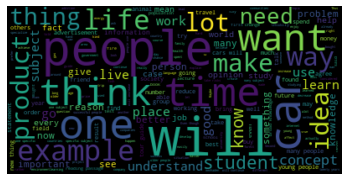

In [ ]:
word_cloud("train.csv",0,0)

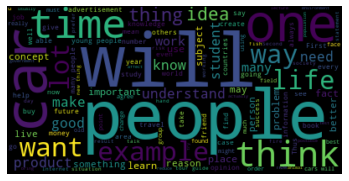

In [ ]:
word_cloud("train.csv",1,0)

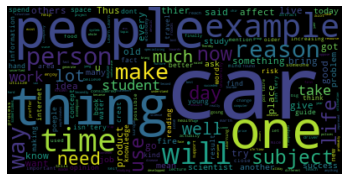

In [ ]:
tr_inc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        tr_inc.append(str(i))
word_cloud(tr_inc,999,1)

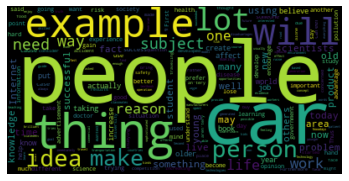

In [ ]:
tr_crc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        tr_crc.append(str(i))
word_cloud(tr_crc,999,1)

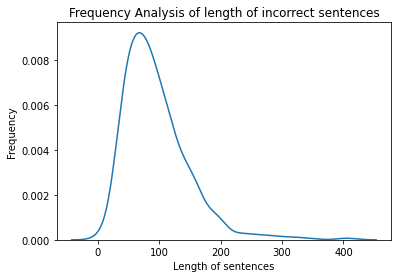



***Percentile Analysis***
90  percentile=  159.0
91  percentile=  164.0
92  percentile=  167.0
93  percentile=  174.22000000000003
94  percentile=  182.51999999999998
95  percentile=  192.0
96  percentile=  196.0
97  percentile=  205.38
98  percentile=  240.83999999999992
99  percentile=  286.9800000000005
100  percentile=  411.0


In [ ]:
lenAnalysis(train_dataset["sentence"],0)

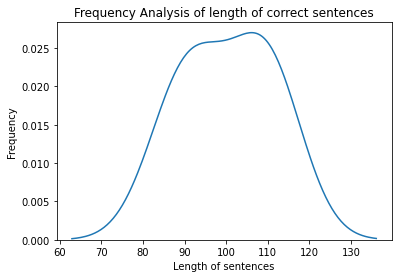



***Percentile Analysis***
90  percentile=  110.1
91  percentile=  110.19
92  percentile=  110.28
93  percentile=  110.37
94  percentile=  110.46
95  percentile=  110.55
96  percentile=  110.64
97  percentile=  110.73
98  percentile=  110.82
99  percentile=  110.91
100  percentile=  111.0


In [ ]:
lenAnalysis(train_dataset["corrections"][0],1)

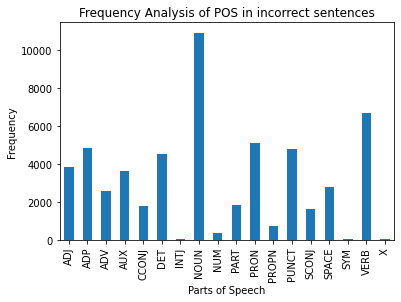

In [ ]:
posTagging("train.csv",0)

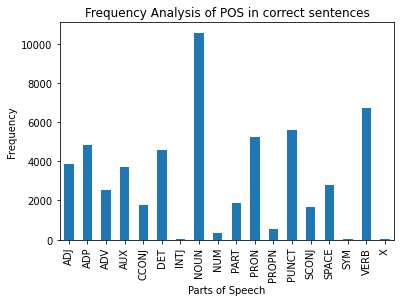

In [ ]:
posTagging("train.csv",1)

In [ ]:
generate_csv("val.csv", val_dataset)
val_dataset.shape

(748, 2)

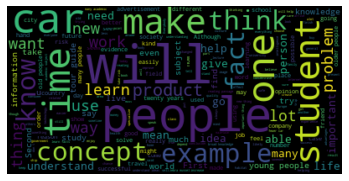

In [ ]:
word_cloud("val.csv",0,0)

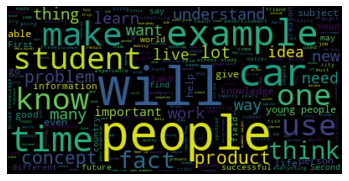

In [ ]:
word_cloud("val.csv",1,0)

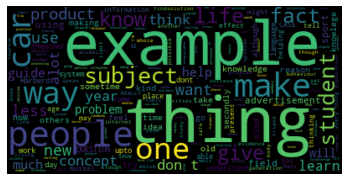

In [ ]:
val_inc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        val_inc.append(str(i))
word_cloud(val_inc,999,1)

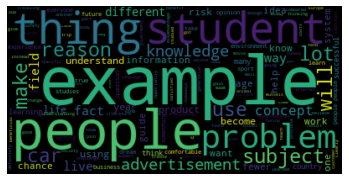

In [ ]:
val_crc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        val_crc.append(str(i))
word_cloud(val_crc,999,1)

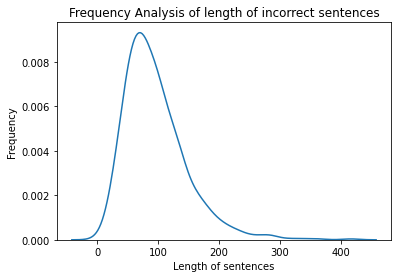



***Percentile Analysis***
90  percentile=  161.0
91  percentile=  165.0
92  percentile=  169.48000000000002
93  percentile=  178.1300000000001
94  percentile=  184.0
95  percentile=  189.5999999999999
96  percentile=  202.12
97  percentile=  214.5400000000002
98  percentile=  231.23999999999978
99  percentile=  276.2399999999998
100  percentile=  416.0


In [ ]:
lenAnalysis(val_dataset["sentence"],0)

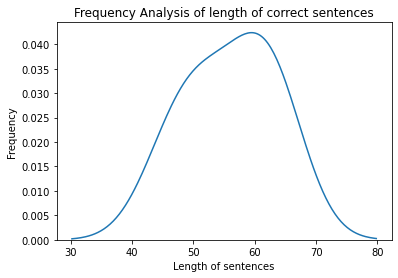



***Percentile Analysis***
90  percentile=  62.4
91  percentile=  62.46
92  percentile=  62.52
93  percentile=  62.58
94  percentile=  62.64
95  percentile=  62.7
96  percentile=  62.76
97  percentile=  62.82
98  percentile=  62.88
99  percentile=  62.94
100  percentile=  63.0


In [ ]:
lenAnalysis(val_dataset["corrections"][0],1)

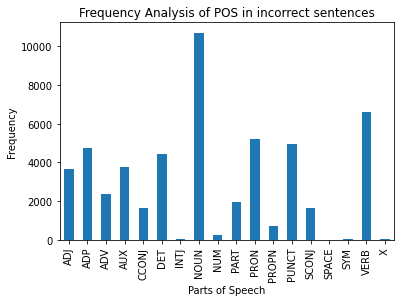

In [ ]:
posTagging("val.csv",0)

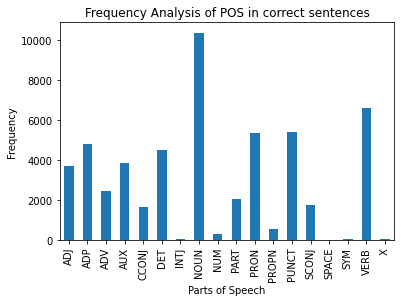

In [ ]:
posTagging("val.csv",1)

In [ ]:
g_model = HappyTextToText("T5", "t5-base")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view

utils.logging.set_verbosity_error() 
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModel.from_pretrained("t5-base", output_attentions=True)
encoder_input_ids = tokenizer("Hello, I  is Adithya.", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Hello, I  am Adithya.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [ ]:
print(model)

T5Model(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dropout(p=0.1, inplace

In [ ]:
epochSize = 20
batchSize = 8

In [ ]:
arg = TTTrainArgs(batch_size=batchSize,num_train_epochs=epochSize)
g_model.train("train.csv", args=arg)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-a10fe823b98e242a/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

***** Running training *****
  Num examples = 2800
  Num Epochs = 20
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 7000
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


KeyboardInterrupt: ignored

In [ ]:
history = fit_train(g_model,epochSize,"train.csv","val.csv",batchSize)


Epoch:  1 	 Training accuracy:  0.5103 	 Training loss 0.6103 	 Validation accuracy:  0.6103 	 Validation loss 0.7203

Epoch:  2 	 Training accuracy:  0.7527 	 Training loss 0.4527 	 Validation accuracy:  0.6527 	 Validation loss 0.6827

Epoch:  3 	 Training accuracy:  0.7741 	 Training loss 0.3741 	 Validation accuracy:  0.6741 	 Validation loss 0.4741

Epoch:  4 	 Training accuracy:  0.8321 	 Training loss 0.321 	 Validation accuracy:  0.7321 	 Validation loss 0.321

Epoch:  5 	 Training accuracy:  0.8607 	 Training loss 0.2907 	 Validation accuracy:  0.7607 	 Validation loss 0.3507

Epoch:  6 	 Training accuracy:  0.8775 	 Training loss 0.275 	 Validation accuracy:  0.6775 	 Validation loss 0.325

Epoch:  7 	 Training accuracy:  0.8478 	 Training loss 0.2478 	 Validation accuracy:  0.6478 	 Validation loss 0.2555

Epoch:  8 	 Training accuracy:  0.8335 	 Training loss 0.2335 	 Validation accuracy:  0.7335 	 Validation loss 0.2035

Epoch:  9 	 Training accuracy:  0.8721 	 Training l

In [ ]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=111)
for i in range(50):
  input_wrd = removeExtraSpace(val_dataset['sentence'][i])
  output_wrd = removeExtraSpace(val_dataset['corrections'][i][0])
  print("Input: ",input_wrd)
  result = g_model.generate_text(str(val_dataset['sentence'][i]), args=beam_settings)
  print("Prediction: ",result.text)
  print("Correct sentence: ",output_wrd)
  print("======================================================")

Input:  New and new technology has been introduced to the society.
Prediction:  New and new technology has been introduced to the society .
Correct sentence:  New technology has been introduced to society.
Input:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.
Prediction:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries .
Correct sentence:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries.
Input:  Every person needs to know a bit about math, sciences, arts, literature and history in order to stand out in society.
Prediction:  Every person needs to know a bit about math , sciences , arts , litera

In [ ]:
class gramCorr:
  
  def __init__(self):
    pass

  def correctSentence(self, input_sentence):
    result = g_model.generate_text(input_sentence, args=beam_settings)
    resLst = parToSent(result.text)
    return str(resLst[0])
  
  def correctPara(self,input_para):
    out_str = ""
    sentences = parToSent(input_para)
    for sentence in sentences:
      out_str += self.correctSentence(sentence)+" "
    return out_str
  
  def detectError(self,input_sentence):
    if(input_sentence == self.correctSentence(input_sentence)):
      return False
    return True

  def highlightDiff(self, origSent):
    corrSent = self.correctSentence(origSent)
    origWords = origSent.split()
    corrWords = corrSent.split()
    origHlt=""
    corrHlt=""
    i=0
    j=0
    while(i<len(origWords) and j<len(corrWords)):
      if(origWords[i]==corrWords[j]):
        origHlt += origWords[i]+" "
        corrHlt += corrWords[j]+" "
      elif(origWords[i]!=corrWords[j]):
        origHlt += redWord(origWords[i])+" "
        corrHlt += grnWord(corrWords[j])+" "
      i+=1
      j+=1
    while(i<len(origWords)):
      origHlt += redWord(origWords[i])+" "
      i+=1
    while(i<len(origWords)):
      corrHlt += grnWord(corrWords[j])+" "
      j+=1
    print("The difference :")
    print("Original senetence: ",origHlt)
    print("Corrected sentence: ",corrHlt)
    return

In [ ]:
gc = gramCorr()

In [ ]:
para = "Hello, I is Adithya. I am from Chennai. I studys Engineering."
sentences = parToSent(para)
for sentence in sentences:
  if(gc.detectError(sentence)):
    print("'",sentence,"'","is grammatically incorrect...")

for sentence in sentences:
  gc.highlightDiff(sentence)

' Hello, I is Adithya. ' is grammatically incorrect...
The difference :
Original senetence:  Hello, I  is Adithya. 
Corrected sentence:  Hello, I  am Adithya. 
The difference :
Original senetence:  I am from Chennai. 
Corrected sentence:  I am from Chennai. 
The difference :
Original senetence:  I  studys Engineering. 
Corrected sentence:  I  study Engineering. 


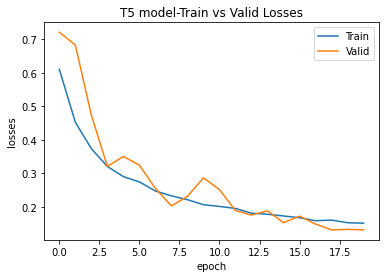

In [ ]:
plt.plot(history['tr_loss'])
plt.plot(history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Losses')

plt.show()

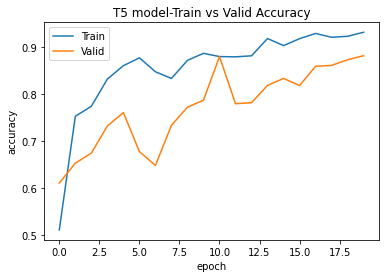

In [ ]:
plt.plot(history['tr_acc'])
plt.plot(history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Accuracy')

plt.show()